In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()
print(x.shape,y.shape)

(50,) (50,)


In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
build_k_indices(y,4,1)

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    loss_tr=[]
    loss_te=[]
    for k_index in k_indices:
        x_test=x[k_index]
        y_test=y[k_index]
        
        mask = np.ones(x.shape[0], dtype=bool) # all elements included/True.
        mask[k_index] = False              # Set unwanted elements to False

        x_train=x[mask]
        y_train=y[mask]
        
        
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form data with polynomial degree: TODO
        # ***************************************************
        xt_train=build_poly(x_train,degree)
        xt_test=build_poly(x_test,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression: TODO
        # ***************************************************
        mse,w=ridge_regression(y_train,xt_train,lambda_)
        mse=compute_mse(y_train,xt_train,w)
        loss_tr.append(mse)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # calculate the loss for train and test data: TODO
        # ***************************************************
        mse_test=compute_mse(y_test,xt_test,w)
        loss_te.append(mse_test)
    return np.sqrt(np.mean(loss_tr)), np.sqrt(np.mean(loss_te))

1


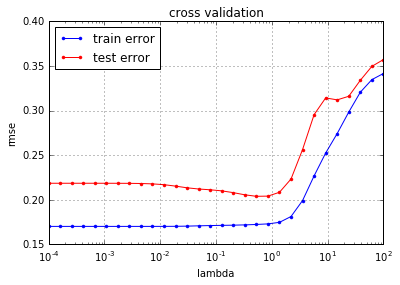

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************  
    for lamb in lambdas:
        loss_tr,loss_te=cross_validation(y,x,k_indices,k_fold,lamb,degree)
        mse_tr.append(loss_tr)
        mse_te.append(loss_te)
    cross_validation_visualization(lambdas, mse_tr, mse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

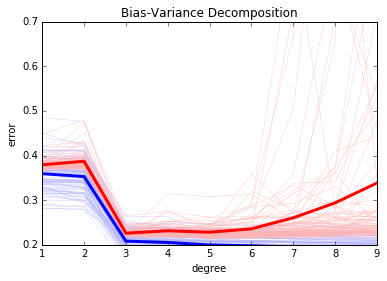

In [36]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train,x_test,y_train,y_test=split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for degree in degrees:
            xt_train=build_poly(x_train,degree)
            xt_test=build_poly(x_test,degree)
            mse,w=least_squares(y_train,xt_train)
            rmse_tr[index_seed,degree-1]=np.sqrt(compute_mse(y_train,xt_train,w))
            rmse_te[index_seed,degree-1]=np.sqrt(compute_mse(y_test,xt_test,w))
      

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()